# Chapter 10: Row Reduction & LU Decomposition

## Concepts

In [34]:
from matplotlib import pyplot as plt
import numpy as np
import sympy as sym
import scipy.linalg
import time

In [35]:
# Solving Matrix Equations (Ax=B)

matrix_a = np.random.randn(4, 4)
matrix_b = np.random.randn(4, 4)

# Correct answer (pre-multiply)
matrix_x1 = np.linalg.inv(matrix_a) @ matrix_b

# Incorrect answer (post-multiply)
matrix_x2 = matrix_b @ np.linalg.inv(matrix_a)

# Calculate residuals
residual_1 = (matrix_a @ matrix_x1) - matrix_b
residual_2 = matrix_a @ matrix_x2 - matrix_b

print("Residual from Method 1 is close to zeros matrix:", np.allclose(np.zeros((4,4)), residual_1))
print("Residual from Method 2 is close to zeros matrix:",np.allclose(np.zeros((4,4)), residual_2))

Residual from Method 1 is close to zeros matrix: True
Residual from Method 2 is close to zeros matrix: False


In [36]:
# RREF (Row-Reduced Echelon Form) via Gauss-Jordan Elimination

# Create matrix equation matrix in sympy
matrix_a = np.array([
    [1, 1 ,4],
    [-1/2, 1, 2]
])
symMat = sym.Matrix(matrix_a)

# RREF via Gauss-Jordan Elimination
symMat.rref()[0]

Matrix([
[1, 0, 1.33333333333333],
[0, 1, 2.66666666666667]])

In [37]:
# LU Decomposition

# Perform LU Decomposition
matrix_a = np.array([
    [2, 2, 4],
    [1, 0, 3],
    [2, 1, 2]
])

_, L, U = scipy.linalg.lu(matrix_a)

print("Lower Triangular Matrix: ", "\n", L, "\n" )
print("Upper Triangular Matrix: ", "\n", U)

Lower Triangular Matrix:  
 [[1.  0.  0. ]
 [0.5 1.  0. ]
 [1.  1.  1. ]] 

Upper Triangular Matrix:  
 [[ 2.  2.  4.]
 [ 0. -1.  1.]
 [ 0.  0. -3.]]


## Code Exercises

In [38]:
# Exercise 10-1 (Timing LU decompositions on 1K 100x100 matrices)

start = time.time()

for i in range(1000):
    matrix_a = np.random.randn(100,100)
    _, L, U = scipy.linalg.lu(matrix_a)

runtime = time.time() - start

# print the runtime in milliseconds
print(f'Total runtime: {runtime * 1000:.2f} ms')

Total runtime: 467.03 ms


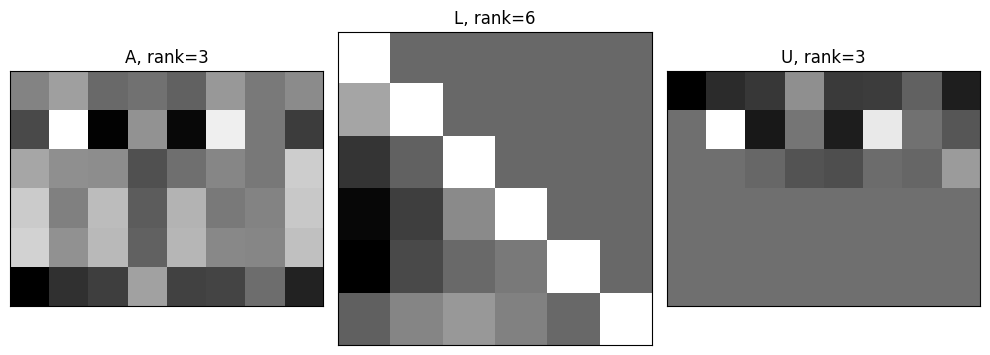

In [39]:
# Exercise 10-2 (Matrix Ranks, Original and LU decomposed)

rows = 6
columns = 8
rank = 3

# Create the rank-3 6x8 Matrix
matrix_a = np.random.randn(rows, rank) @ np.random.randn(rank, columns)

_, matrix_l, matrix_u = scipy.linalg.lu(matrix_a)

# Create plot
fig, axis = plt.subplots(1, 3, figsize=(10, 4))
titles = ['A, rank=3', 'L, rank=6', 'U, rank=3']
matrices = [matrix_a, matrix_l, matrix_u]

for i, (title, matrix) in enumerate(zip(titles, matrices)):
    ax = axis[i]
    ax.imshow(matrix, cmap='gray')
    ax.set_title(title)
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

In [58]:
# Exercise 10-3 (Calculating Matrix Determinant via outputs of LU Decomposition)

matrix_a = np.random.randn(5, 5)

matrix_p, matrix_l, matrix_u = scipy.linalg.lu(matrix_a)

# Calculate the product of the diagonal elements multiplied by the determinant of the permutation matrix
diagonal_elements = np.diag(matrix_u)
diagonal_product = np.prod(diagonal_elements)
permutation_determinant = np.linalg.det(matrix_p)
matrix_a_determinant = diagonal_product * permutation_determinant

# Calculate the determinant using numpy
numpy_det = np.linalg.det(matrix_a)

print("Matrix A determinant (using diagonal product method):", matrix_a_determinant)
print("Matrix A determinant (using numpy method):", numpy_det)

Matrix A determinant (using diagonal product method): -7.33378660084299
Matrix A determinant (using numpy method): -7.333786600842993


In [65]:
# Exercise 10-4 (Calculating Matrix Inverse via outputs of LU Decomposition)

# Create Random Numbers Matrix
matrix_a = np.random.randn(4, 4)

# Perform LU Decomposition
matrix_p, matrix_l, matrix_u = scipy.linalg.lu(matrix_a)

check = np.allclose(np.linalg.inv(matrix_a), (np.linalg.inv(matrix_u) @ np.linalg.inv(matrix_l)) @ matrix_p)
print("Inverse of A is equal to product of inverses of U & L multiplied by P in that order:", check)

Inverse of A is equal to product of inverses of U & L multiplied by P in that order: True


In [69]:
# Exercise 10-5 (Matrix Equivalence: Comparing A^T @ A Computed Directly and via LU Decomposition)

# Create Random Numbers Matrix
matrix_a = np.random.randn(4, 4)

# Perform LU Decomposition
matrix_p, matrix_l, matrix_u = scipy.linalg.lu(matrix_a)

result_1 =  matrix_a.T @ matrix_a
result_2 = matrix_u.T @ matrix_l.T @ matrix_l @ matrix_u

check_pt1 = np.allclose(result_1, result_2)
check_pt2 = not np.allclose(matrix_p, np.eye(4))
check = check_pt1 and check_pt2
print("A^T @ A == U.T @ L.T @ L @ U even when P != I:", check)

A^T @ A == U.T @ L.T @ L @ U even when P != I: True
